# 图片向量搜索示例

## 构建索引

在开始前，需要确保SPTAG安装正常并完成以下几个步骤：

1. 将[tensorflow/models](https://github.com/tensorflow/models)克隆到`./image_to_vector`文件夹

2. 在[Pre-Train Model](https://github.com/tensorflow/models/tree/master/research/slim#pre-trained-models)中下载VGG 16的Checkpoint并保存至`./image_to_vector/checkpoint`目录

3. 将`[...]/image_to_vector/models/research/slim`添加到环境变量`PYTHONPATH`


下面利用预训练好的vgg16模型将图片转换成向量

In [1]:
from image_to_vector import imagenet
import os

model = imagenet.ModelInstance() # 实例化模型

img_dir = './imgs' # 图片数据集目录
all_img_files = './all_img_file.txt' # 图片路径文件

# 将所有图片路径保存至all_img_files中
with open(all_img_files,'w') as f:
    for file in os.listdir(img_dir):
        f.write("{}/{}\n".format(img_dir,file))

# 从all_img_files中读入图片并将输出的结果保存至output.vector
model.EvalFile(all_img_files,'./output.vector')


利用命令行命令将模型输出的向量构建成索引

其中，indexbuilder用法如下：
```
Usage:
./IndexBuiler [options]
Options:
 -d, --dimension <value>       Dimension of vector, required.
 -v, --vectortype <value>      Input vector data type (e.g. Float, Int8, Int16), required.
 -i, --input <value>           Input raw data, required.
 -o, --outputfolder <value>    Output folder, required.
 -a, --algo <value>            Index Algorithm type (e.g. BKT, KDT), required.

 -t, --thread <value>          Thread Number, default is 32.
 --delimiter <value>           Vector delimiter, default is |.
 Index.<ArgName>=<ArgValue>    Set the algorithm parameter ArgName with value ArgValue.
 ```

In [2]:
#build index by command line
!indexbuilder -d 4096 -v Float -i output.vector -o carIndex -a BKT

Begin Subtask: 31, start offset position:255396290
Begin Subtask: 6, start offset position:49431540
Begin Subtask: 14, start offset position:115340260
Begin Subtask: 3, start offset position:24715770
Begin Subtask: 16, start offset position:131817440
Begin Subtask: 29, start offset position:238919110
Begin Subtask: 2, start offset position:16477180
Begin Subtask: 30, start offset position:247157700
Begin Subtask: 7, start offset position:57670130
Begin Subtask: 13, start offset position:107101670
Begin Subtask: 27, start offset position:222441930
Begin Subtask: 24, start offset position:197726160
Begin Subtask: 12, start offset position:98863080
Begin Subtask: 28, start offset position:230680520
Begin Subtask: 1, start offset position:8238590
Begin Subtask: 9, start offset position:74147310
Begin Subtask: 18, start offset position:148294620
Begin Subtask: 23, start offset position:189487570
Begin Subtask: 10, start offset position:82385900
Begin Subtask: 4, start offset position:329543

Setting NumberOfThreads with value 32


## 利用图片查询

In [3]:
# import requirements

import SPTAG
import numpy as np
from PIL import Image

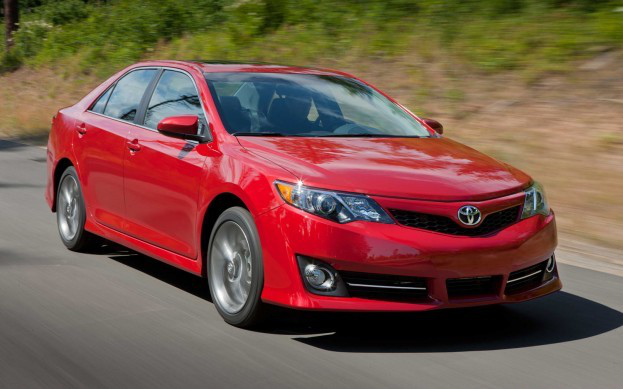

In [4]:
# 待查询的图片
query_img = './imgs/00033.jpg'
display(Image.open(query_img))

In [5]:
# 将图片转化成向量

query = model.Predict([query_img])[0]
xq = query.flatten()
xq

array([0.       , 0.       , 3.780911 , ..., 3.8450117, 0.       ,
       0.       ], dtype=float32)

In [6]:
# 加载索引
imgIndex = SPTAG.AnnIndex.Load('carIndex')

# 查询
k=4 # number of results to return

result = imgIndex.SearchWithMetaData(xq,k)

# 显示结果
print("ids:{}\n".format(result[0])) # ids
print("ditances:{}\n".format(result[1])) # distances
print("files:{}\n".format(result[2])) # files

ids:[32, 6400, 88, 688]

ditances:[-76.37580871582031, -65.97869873046875, -65.63648986816406, -65.565673828125]

files:[b'./imgs/00033.jpg', b'./imgs/06401.jpg', b'./imgs/00089.jpg', b'./imgs/00689.jpg']



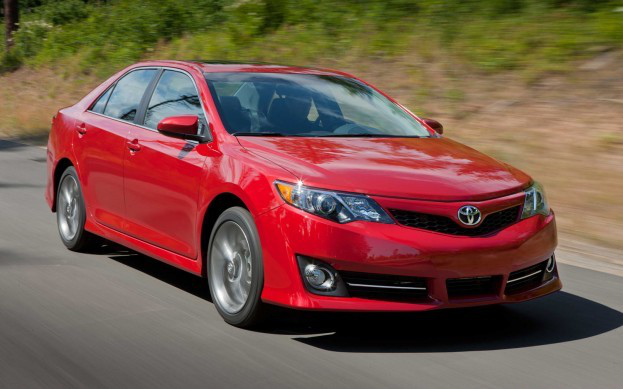

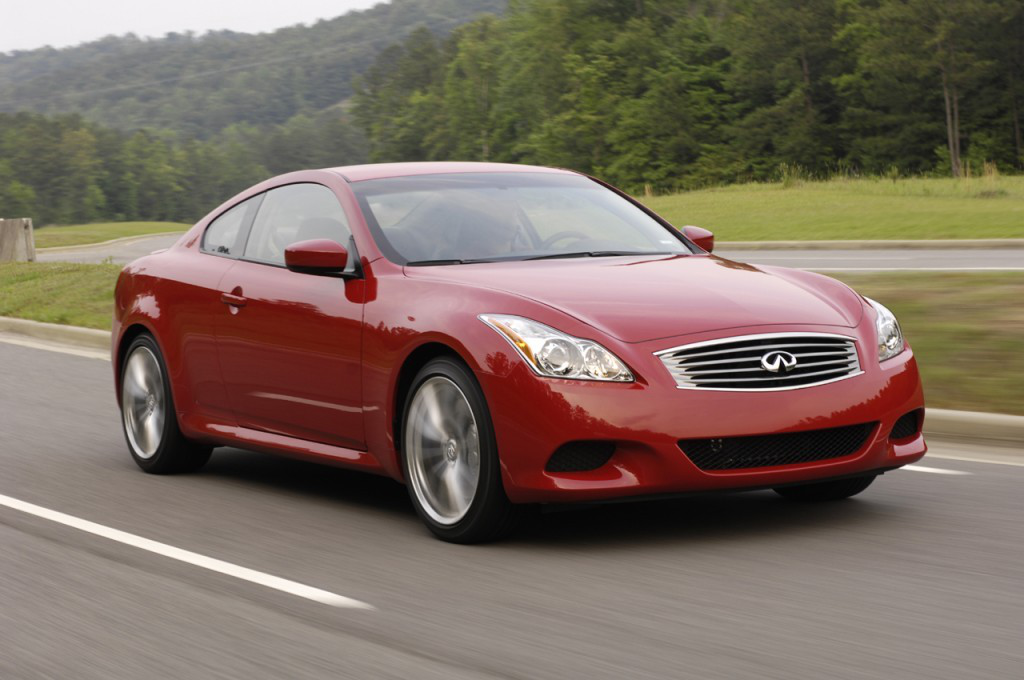

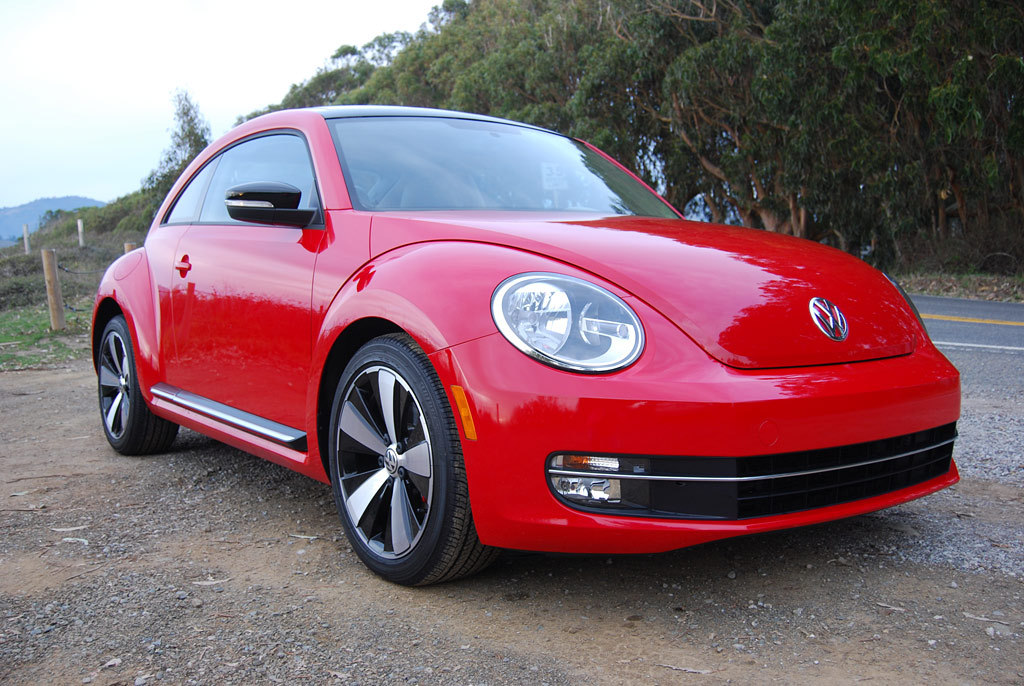

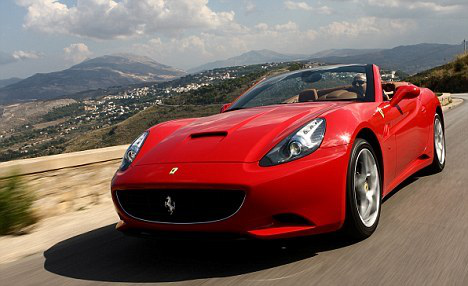

In [7]:
for img in result[2]:
    display(Image.open(img))